<a href="https://colab.research.google.com/github/Hsayed1/Medical-Mnist-Image-Classifier/blob/main/Medical_Image_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive
import shutil
from sklearn.metrics import classification_report
import random
"""This code loads, preprocesses, and trains a cnn on the medical mnist dataset. 4 experiments were tried in this file and have been reported. Two cnn models were used"""

'This code loads, preprocesses, and trains a cnn on the medical mnist dataset. 4 experiments were tried in this file and have been reported. Two cnn models were used'

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##importing data from drive
zip_content = zipfile.ZipFile('/content/drive/MyDrive/medicalimages.zip', 'r')
zip_content.extractall('data')
zip_content.close()

In [ ]:
data = '/content/data/medicalimages'
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
#randomly sample 5k images from each class because dataset was too large.

# Define the class names
class_names = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

# Define the target number of images per class
images_per_class = 5000

# Create a new directory for the reduced dataset
reduced_data_path = '/content/data/reduced_medicalimages'
os.makedirs(reduced_data_path, exist_ok=True)

# Loop through each class
for class_name in class_names:
    class_path = os.path.join(data, class_name)
    target_class_path = os.path.join(reduced_data_path, class_name)

    os.makedirs(target_class_path, exist_ok=True)

    # List all files in the class directory and shuffle the list to randomize it
    class_files = os.listdir(class_path)
    random.shuffle(class_files)

    # Copy the desired number of randomly selected images (5,000) from the class directory to the reduced dataset directory
    for i in range(images_per_class):
        file_name = class_files[i]
        source_file_path = os.path.join(class_path, file_name)
        target_file_path = os.path.join(target_class_path, file_name)
        shutil.copyfile(source_file_path, target_file_path)

In [ ]:
#split into training data
train = tf.keras.utils.image_dataset_from_directory(
    reduced_data_path,
    validation_split=0.3,  # 70% for training
    subset="training",
    seed=123,
    image_size=(img_height, img_width), #resize to 150x150
    batch_size=batch_size
)


Found 30000 files belonging to 6 classes.
Using 21000 files for training.


In [ ]:
#split into validation
val = tf.keras.utils.image_dataset_from_directory(
    reduced_data_path,
    validation_split=0.2,  # 20% for validation
    subset="validation",
    seed=123,
    image_size=(img_height, img_width), #resize to 150x150
    batch_size=batch_size
)

Found 30000 files belonging to 6 classes.
Using 6000 files for validation.


In [ ]:
#split into testing
test = tf.keras.utils.image_dataset_from_directory(
    reduced_data_path,
    validation_split=0.1,  # 10% for testing
    subset="validation",  #
    seed=123,
    image_size=(img_height, img_width), #resize to 150x150
    batch_size=batch_size
)

Found 30000 files belonging to 6 classes.
Using 3000 files for validation.


In [ ]:
num_classes = len(class_names)

In [ ]:

# Creating a Sequential model for image classification
model = Sequential([
    # Normalizing pixel values to the range [0,1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers with relu activation and max pooling for feature extraction
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flatten layer to prepare for dense layers
    layers.Flatten(),

    # Dense layers with relu activation and dropout for regularization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer with softmax activation for multi-class classification
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
# Compiling the model with the Adam optimizer, Sparse Categorical Crossentropy loss,
# and accuracy as the evaluation metric
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       7

In [ ]:
#TRAINING
#The following model was first trained with 20 epochs then it colab crashed at the 18th epoch. The model worked with 10 epochs
epochs= 10
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


657/657 [==============================] - 38s 38ms/step - loss: 0.1492 - accuracy: 0.9486 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 2/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 0.0097 - val_accuracy: 0.9977
Epoch 3/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0132 - val_accuracy: 0.9972
Epoch 4/10
657/657 [==============================] - 23s 34ms/step - loss: 0.0226 - accuracy: 0.9947 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 5/10
657/657 [==============================] - 26s 40ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0076 - val_accuracy: 0.9975
Epoch 6/10
657/657 [==============================] - 23s 34ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0140 - val_accuracy: 0.9975
Epoch 7/10
657/657 [==============================] - 23s 34ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0360 - val_accuracy: 0.9942
Epo

accuracy:  [0.9486190676689148, 0.9923809766769409, 0.9933333396911621, 0.9946666955947876, 0.9974285960197449, 0.9966190457344055, 0.9976666569709778, 0.9957619309425354, 0.9976190328598022, 0.9961904883384705]
val accuracy:  [0.996666669845581, 0.9976666569709778, 0.9971666932106018, 0.9980000257492065, 0.9975000023841858, 0.9975000023841858, 0.9941666722297668, 0.9978333115577698, 0.9978333115577698, 0.996999979019165]
loss:  [0.14924558997154236, 0.031520821154117584, 0.024141322821378708, 0.022561319172382355, 0.009137543849647045, 0.01161198876798153, 0.009031887166202068, 0.01762758195400238, 0.007979667745530605, 0.020351674407720566]
val loss:  [0.01265132799744606, 0.009743550792336464, 0.013243090361356735, 0.007790159899741411, 0.00764572573825717, 0.014020475558936596, 0.03601235896348953, 0.009686301462352276, 0.014774303883314133, 0.018366964533925056]


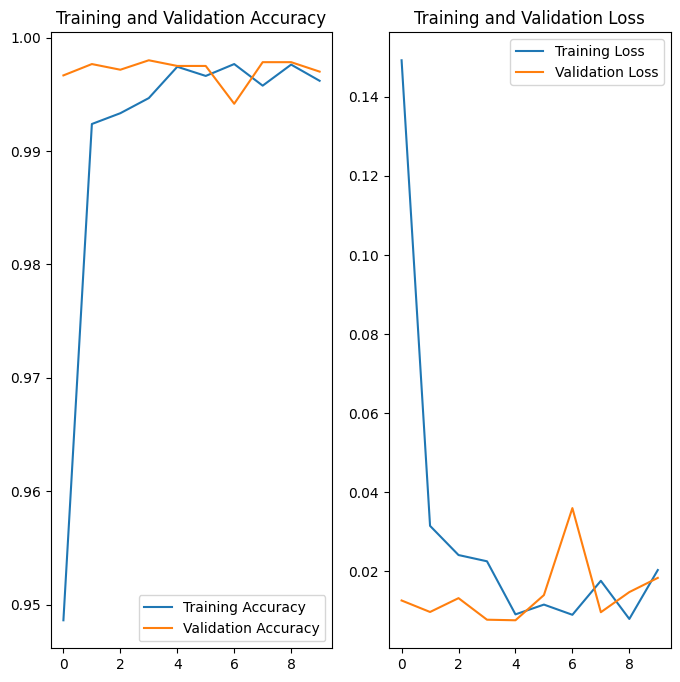

In [ ]:
# Extracting and plotting accuracy and loss metrics from the training history
acc = history.history['accuracy']
print("accuracy: ", acc)
val_acc = history.history['val_accuracy']
print("val accuracy: ", val_acc)

loss = history.history['loss']
print("loss: ", loss)

val_loss = history.history['val_loss']
print("val loss: ", val_loss)

epochs_range = range(epochs)

# Plotting accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test)

# Print the test results (loss and accuracy)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

94/94 [==============================] - 1s 15ms/step - loss: 0.0156 - accuracy: 0.9977
Test Loss: 0.01557239145040512
Test Accuracy: 0.9976666569709778


In [ ]:
# Define Sequential model for the 2nd model with hypertuned parameters
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values to [0,1]

    # Convolutional Block 1
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters, 3x3 kernel, 'same' padding, ReLU activation
    layers.BatchNormalization(),  # Batch normalization for stabilizing and accelerating training
    layers.MaxPooling2D(),  # Max pooling layer

    # Convolutional Block 2
    layers.Conv2D(128, 3, padding='same', activation='relu'),  # 128 filters, 3x3 kernel, 'same' padding, ReLU activation
    layers.BatchNormalization(),  # Batch normalization for stabilizing and accelerating training
    layers.MaxPooling2D(),  # Max pooling layer

    # Convolutional Block 3
    layers.Conv2D(256, 3, padding='same', activation='relu'),  # 256 filters, 3x3 kernel, 'same' padding, ReLU activation
    layers.BatchNormalization(),  # Batch normalization for stabilizing and accelerating training
    layers.MaxPooling2D(),  # Max pooling layer

    layers.Flatten(),  # Flatten the output for the fully connected layers

    # Fully Connected Layers
    layers.Dense(512, activation='relu'),  # 512 units, ReLU activation
    layers.Dropout(0.5),  # Dropout layer for regularization

    layers.Dense(256, activation='relu'),  # 256 units, ReLU activation
    layers.Dropout(0.5),  # Dropout layer for regularization

    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 150, 150, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 128)      

In [ ]:
#the second model was originally ran with 10 epochs however colab failed after the 5th one. The model works with 6.
epochs= 6
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


657/657 [==============================] - 59s 85ms/step - loss: 3.8700 - accuracy: 0.9609 - val_loss: 0.2860 - val_accuracy: 0.9963
Epoch 2/6
657/657 [==============================] - 55s 83ms/step - loss: 1.6174 - accuracy: 0.9876 - val_loss: 0.2791 - val_accuracy: 0.9973
Epoch 3/6
657/657 [==============================] - 53s 81ms/step - loss: 1.3970 - accuracy: 0.9905 - val_loss: 0.2382 - val_accuracy: 0.9978
Epoch 4/6
657/657 [==============================] - 54s 82ms/step - loss: 1.5755 - accuracy: 0.9891 - val_loss: 0.3809 - val_accuracy: 0.9978
Epoch 5/6
657/657 [==============================] - 54s 82ms/step - loss: 0.5781 - accuracy: 0.9949 - val_loss: 0.3801 - val_accuracy: 0.9967
Epoch 6/6
657/657 [==============================] - 54s 81ms/step - loss: 0.4847 - accuracy: 0.9940 - val_loss: 0.1919 - val_accuracy: 0.9983


In [ ]:
# Extracting and plotting accuracy and loss metrics from the training history
acc = history.history['accuracy']
print("accuracy: ", acc)
val_acc = history.history['val_accuracy']
print("val accuracy: ", val_acc)

loss = history.history['loss']
print("loss: ", loss)

val_loss = history.history['val_loss']
print("val loss: ", val_loss)

epochs_range = range(epochs)

# Plotting accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(test)
# Print the test results (loss and accuracy)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])